In [1]:
import open3d as o3d
import numpy as np
import os
import sys
import math
import pandas as pd
from matplotlib import pylab
import itertools
from matplotlib import pyplot as plt
from statistics import mean


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
path = ("./3D Point Cloud Dataset/")
mylist = os.listdir(path)

mylist

['1-3.95.ply',
 '10-4.84.ply',
 '11-4.48.ply',
 '12-3.70.ply',
 '13-6.63.ply',
 '14-2.67.ply',
 '15-4.99.ply',
 '16-4.50.ply',
 '17-4.98.ply',
 '18-5.02.ply',
 '19-3.34.ply',
 '2-6.47.ply',
 '20-4.39.ply',
 '21-3.93.ply',
 '22-4.81.ply',
 '23-4.59.ply',
 '24-5.12.ply',
 '25-4.35.ply',
 '26-2.53.ply',
 '27-3.14.ply',
 '28-3.49.ply',
 '29-1.80.ply',
 '3-7.71.ply',
 '30-3.13.ply',
 '4-5.58.ply',
 '5-5.15.ply',
 '6-4.46.ply',
 '7-4.52.ply',
 '8-5.23.ply',
 '9-3.23.ply']

In [3]:
df = pd.DataFrame()
df = pd.DataFrame(columns = ['Name', 'Real Height', 'Pixel Height'])

for i in mylist:
    name = i[:-9]
    height = float(i[-8:-4])
    
    pcd = o3d.io.read_point_cloud(path + i)
    cl, ind = pcd.remove_statistical_outlier(nb_neighbors=300, std_ratio=2.0)
    lowest_pixel = o3d.geometry.PointCloud.get_min_bound(cl)[2]
    heighest_pixel = o3d.geometry.PointCloud.get_max_bound(pcd)[2]
    
    
    df = df.append({'Name' : name, 'Real Height' : height, 'Pixel Height' : heighest_pixel - lowest_pixel},
        ignore_index = True)
    
df.to_csv('./data_tree.csv') 

C:\Users\NIK\AppData\Local\Temp\ipykernel_6920\3221723709.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name' : name, 'Real Height' : height, 'Pixel Height' : heighest_pixel - lowest_pixel},
C:\Users\NIK\AppData\Local\Temp\ipykernel_6920\3221723709.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name' : name, 'Real Height' : height, 'Pixel Height' : heighest_pixel - lowest_pixel},
C:\Users\NIK\AppData\Local\Temp\ipykernel_6920\3221723709.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name' : name, 'Real Height' : height, 'Pixel Height' : heighest_pixel - lowest_pixel},
C:\Users\NIK\AppData\Local\Temp\ipykernel_6920\3221723709.py:14: FutureWarning: The fram

Scatter Plot:  


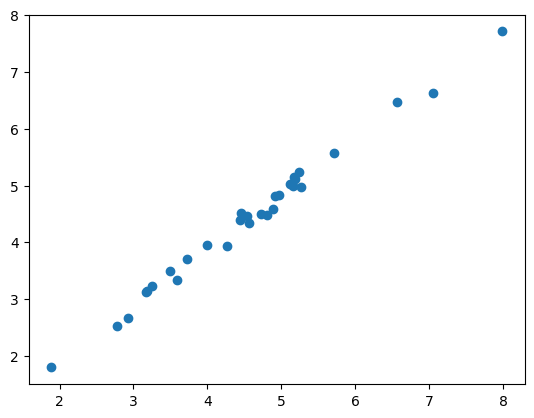

In [4]:
print("Scatter Plot:  ")
plt.scatter(df["Pixel Height"] , df["Real Height"])

In [5]:
df

,Name,Real Height,Pixel Height
0,1,3.95,3.991000
1,10,4.84,4.969000
2,11,4.48,4.801001
3,12,3.70,3.720000
4,13,6.63,7.049000
5,14,2.67,2.927001
6,15,4.99,5.164000
7,16,4.50,4.728000
8,17,4.98,5.268000
9,18,5.02,5.115000


In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3)

In [7]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(train["Pixel Height"] , train["Real Height"])

Scatter Plot:  


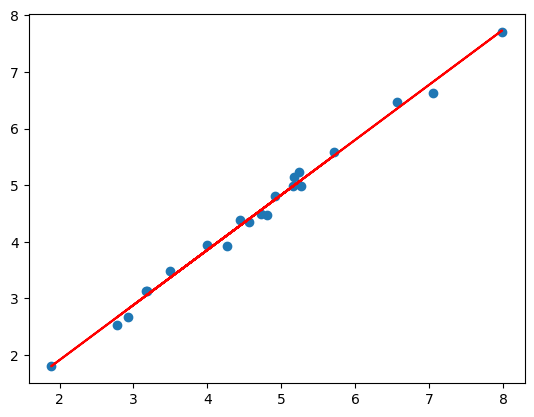

In [8]:
print("Scatter Plot:  ")
plt.scatter(train["Pixel Height"] , train["Real Height"])
plt.plot(train["Pixel Height"], intercept + slope*train["Pixel Height"], 'r', label='fitted line')

In [9]:
def linregress(x):
  return slope * x + intercept

In [10]:
total = 0
num = len(df["Pixel Height"])
test["Predict Height"] = np.nan
test["Accuracy"] = np.nan
test["Error"] = np.nan
for index, row in test.iterrows():
    
    predict = linregress(row["Pixel Height"])
    error_percent = abs((predict - row["Real Height"])/row["Real Height"]*100)
    accuracy = 100-error_percent
    error = abs((predict - row["Real Height"]))
    
    test.at[index,'Predict Height'] = predict
    test.at[index,'Accuracy'] = accuracy
    test.at[index,'Error'] = predict - row["Real Height"]
    
    print("%.3f" % accuracy)
        
    total += abs(error_percent)
    
print('')
avr = total/len(test["Pixel Height"])
print('Error Average')
print("%.3f" % avr)

96.880
99.128
97.061
96.842
98.230
98.398
95.164
97.918
96.314

Error Average
2.674
